In [ ]:
from ragas.metrics import faithfulness, answer_relevancy
from ragas.metrics._context_precision import context_precision, context_utilization
from ragas import evaluate
from langchain.schema import Document
from book_assist import BookAssistant
#from ragas.embeddings import HuggingfaceEmbeddings
from ragas.metrics import AnswerRelevancy
from langchain_community.embeddings import HuggingFaceEmbeddings
from datasets import Dataset

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall
from ragas.evaluation import evaluate
from datasets import Dataset

assistant = BookAssistant()

# Инициализация эмбеддингов
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Сгенерированные вопросы
queries = [
    "Рассказы о путешествиях, исторические приключения",
    "В какой книге описываются космические приключения и встречи с инопланетянами?",
    "Какое произведение рассказывает о выживании в постапокалиптическом мире?",
    "Короткие рассказы о любви.",
    "Книги о выживании после глобальной катастрофы.",
    "Книги о путешествиях во времени.",
    "Криминальный детектив"
]


# Подготовка словаря для хранения результатов
evaluation_results = []

# Обработка каждого запроса по отдельности
for query in queries:
    print(f"\nОбработка запроса: {query}")
    response = assistant.recommend_book(query, max_results=5)  # Получаем топ-5 книг

    if isinstance(response, list):
        metrics_accumulator = {metric.name: [] for metric in [faithfulness, answer_relevancy, context_precision, context_recall, context_utilization]}

        for book in response:
            print(book)
            annotation = book.get("annotation", "")
            print("===", annotation)
            reference = f"Книга по запросу '{query}' должна соответствовать жанру и тематике, указанным в запросе."

            # Создаем объект Dataset для текущей книги
            dataset = Dataset.from_list([{
                "user_input": query,
                "query": query,
                "contexts": [annotation],
                "answer": f"Результаты поиска для запроса '{query}': '{annotation}'",
                "reference": reference  # Заглушка для эталонного ответа
            }])

            # Оценка качества RAG с использованием Ragas
            _result = evaluate(
                dataset=dataset,
                metrics=[faithfulness, answer_relevancy, context_precision, context_recall, context_utilization]
            )

            # Добавляем результаты метрик в аккумулятор
            for metric, score in _result._scores_dict.items():
                # Проверяем, является ли score списком, и усредняем его, если это так
                if isinstance(score, list):
                    metrics_accumulator[metric].append(sum(score) / len(score))
                else:
                    metrics_accumulator[metric].append(float(score))

        # Усреднение метрик для всех топ-5 книг
        averaged_metrics = {metric: sum(scores) / len(scores) if scores else 0.0 for metric, scores in metrics_accumulator.items()}
        averaged_metrics['query'] = query
        evaluation_results.append(averaged_metrics)

# Вывод всех результатов на печать
print("\nИтоговые результаты оценки (усредненные):\n")
for query_result in evaluation_results:
    print(f"Запрос: {query_result['query']}")
    for metric, score in query_result.items():
        if metric != 'query':
            print(f"{metric}: {score:.2f}")
    print('\n')





Обработка запроса: Рассказы о путешествиях, исторические приключения
Исходный запрос:  Рассказы о путешествиях, исторические приключения
Определённый жанр: Приключения
Обогащённый запрос: 
Рассказы о путешествиях, исторические приключения. Ключевые слова:
 1. Путешествия  
2. Исторические приключения  
3. Приключенческие рассказы  
4. Путевые заметки  
5. Исторические события  
6. Географические открытия  
7. Путеводители по историческим местам
{'id': '669412', 'title': 'Илья Муромец в космосе', 'author': 'Темный', 'year': '2020', 'genres': 'Боевая фантастика, Героическая фантастика, Приключения', 'annotation': 'Название: Илья Муромец в космосе. Автор: Темный. Жанр: Боевая фантастика, Героическая фантастика, Приключения. Аннотация: Судьба попаданец, профессия попаданец, хобби попаданец… Принесет ли это приятные моменты прекрасных воспоминаний о сказочных путешествиях? Может очередные неприятности?. Ключевые слова: сказочных путешествиях, путешествиях может, попаданец хобби, воспоминан

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '761104', 'title': 'В походе', 'author': 'Алексеенко Анна', 'year': '2023', 'genres': 'Путешествия и география, Приключения', 'annotation': 'Название: В походе. Автор: Алексеенко Анна. Жанр: Путешествия и география, Приключения. Аннотация: История о том, как раньше ходили в школьные походы…Было очень весело вот так всем вместе отправиться в небольшое путешествие.. Ключевые слова: сказку дочке, сказки рассказанные, серии сказки, разных сказок, сказок была', 'link': 'https://flibusta.site/b/761104', 'score': '0.62'}
=== Название: В походе. Автор: Алексеенко Анна. Жанр: Путешествия и география, Приключения. Аннотация: История о том, как раньше ходили в школьные походы…Было очень весело вот так всем вместе отправиться в небольшое путешествие.. Ключевые слова: сказку дочке, сказки рассказанные, серии сказки, разных сказок, сказок была


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '697183', 'title': 'Легенды разрушенного мира. Тлен. Глава 1', 'author': 'Лёд Артур Александрович', 'year': '2022', 'genres': 'Героическая фантастика, Ужасы, Приключения', 'annotation': 'Название: Легенды разрушенного мира. Тлен. Глава 1. Автор: Лёд Артур Александрович. Жанр: Героическая фантастика, Ужасы, Приключения. Аннотация: Рассказ из серии “Легенды разрушенного мира”. Первая часть из серии рассказов о странствиях юного охотника степных кланов по имени Анвар.. Ключевые слова: серии рассказов, легенды разрушенного, рассказов странствиях, рассказов, рассказ из', 'link': 'https://flibusta.site/b/697183', 'score': '0.61'}
=== Название: Легенды разрушенного мира. Тлен. Глава 1. Автор: Лёд Артур Александрович. Жанр: Героическая фантастика, Ужасы, Приключения. Аннотация: Рассказ из серии “Легенды разрушенного мира”. Первая часть из серии рассказов о странствиях юного охотника степных кланов по имени Анвар.. Ключевые слова: серии рассказов, легенды разрушенного, рассказов странств

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '71489', 'title': 'Владетельница ливанского замка', 'author': 'Бенуа Пьер', 'year': '1997', 'genres': 'Исторические приключения', 'annotation': 'Название: Владетельница ливанского замка. Автор: Бенуа Пьер. Жанр: Исторические приключения. Аннотация: . Ключевые слова: истории какие, возвращаются истории, история приоткроет, истории, двери книг', 'link': 'https://flibusta.site/b/71489', 'score': '0.60'}
=== Название: Владетельница ливанского замка. Автор: Бенуа Пьер. Жанр: Исторические приключения. Аннотация: . Ключевые слова: истории какие, возвращаются истории, история приоткроет, истории, двери книг


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: В какой книге описываются космические приключения и встречи с инопланетянами?
Исходный запрос:  В какой книге описываются космические приключения и встречи с инопланетянами?
Определённый жанр: Приключения
Обогащённый запрос: 
В какой книге описываются космические приключения и встречи с инопланетянами?. Ключевые слова:
 1. Космические приключения  
2. Встречи с инопланетянами  
3. Научная фантастика  
4. Космос  
5. Внеземные цивилизации  
6. Межзвездные путешествия  
7. Контакт с пришельцами
{'id': '668169', 'title': 'Люди', 'author': 'Кость Анастасия', 'year': '2022', 'genres': 'Ужасы, Научная Фантастика, Приключения', 'annotation': 'Название: Люди. Автор: Кость Анастасия. Жанр: Ужасы, Научная Фантастика, Приключения. Аннотация: Эта книга – сборник фантастических, мистических и фэнтезийных рассказов. Встречи с пришельцами, параллельные вселенные, непризнанные гении, мистические озарения, приключения… Разнообразные удивительные, нестандартные ситуации, в которых ге

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '667721', 'title': 'Цепь жизни', 'author': 'Демченко Елена Юрьевна', 'year': '2021', 'genres': 'Космическая фантастика, Социально-психологическая фантастика, Приключения', 'annotation': 'Название: Цепь жизни. Автор: Демченко Елена Юрьевна. Жанр: Космическая фантастика, Социально-психологическая фантастика, Приключения. Аннотация: Взаимодействие исследователя космоса с представителями иного мира, – каким оно может быть? Порой весьма неожиданным!…. Ключевые слова: космической миссии, космосе фантастику, ли космосе, космической, космосе', 'link': 'https://flibusta.site/b/667721', 'score': '0.70'}
=== Название: Цепь жизни. Автор: Демченко Елена Юрьевна. Жанр: Космическая фантастика, Социально-психологическая фантастика, Приключения. Аннотация: Взаимодействие исследователя космоса с представителями иного мира, – каким оно может быть? Порой весьма неожиданным!…. Ключевые слова: космической миссии, космосе фантастику, ли космосе, космической, космосе


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '625127', 'title': 'На задворках Солнечной системы', 'author': 'Фишер Н. М.', 'year': '2021', 'genres': 'Космическая фантастика, Приключения', 'annotation': 'Название: На задворках Солнечной системы. Автор: Фишер Н. М.. Жанр: Космическая фантастика, Приключения. Аннотация: Что нам известно про космос и тех, кто ежесекундно рискуя жизнью, решается его покорить? Какие загадки хранит это неизведанное и бескрайнее пространство? Откуда ждать помощи, если ты – самый обыкновенный маленький человек, дрейфующий в межпланетном пространстве? И с какими страшными тайнами тебе придется столкнуться, приняв эту помощь?. Ключевые слова: оказывается судьба, или реальность, судьба всего, реальность настоящее, реальность', 'link': 'https://flibusta.site/b/625127', 'score': '0.69'}
=== Название: На задворках Солнечной системы. Автор: Фишер Н. М.. Жанр: Космическая фантастика, Приключения. Аннотация: Что нам известно про космос и тех, кто ежесекундно рискуя жизнью, решается его покорить? Какие загад

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '697610', 'title': 'Двенадцать световых лет', 'author': 'Гончаров Николай Валентинович', 'year': '2022', 'genres': 'Космическая фантастика, Путешествия и география, Приключения', 'annotation': 'Название: Двенадцать световых лет. Автор: Гончаров Николай Валентинович. Жанр: Космическая фантастика, Путешествия и география, Приключения. Аннотация: Одиноки ли мы во Вселенной? Практически бесконечное количе-ство звезд, а значит и планет наводит на мысль о том, что и количествовнеземных цивилизаций также почти бесконечно. Каким будет пер-вый контакт землян с инопланетянами? В романе автор описываетсвою версию этого эпохального события и приглашает читателя по-фантазировать вместе с ним.. Ключевые слова: герой раэл, главный герой, экипаже они, вражеской диверсии, эпицентре вражеской', 'link': 'https://flibusta.site/b/697610', 'score': '0.67'}
=== Название: Двенадцать световых лет. Автор: Гончаров Николай Валентинович. Жанр: Космическая фантастика, Путешествия и география, Приключения. А

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '786121', 'title': 'Беляш, Серыш и Шоколадка. Космические приключения', 'author': 'Летун Юлия', 'year': '2024', 'genres': 'Космическая фантастика, Фантастика для детей, Приключения для детей и подростков', 'annotation': 'Название: Беляш, Серыш и Шоколадка. Космические приключения. Автор: Летун Юлия. Жанр: Космическая фантастика, Фантастика для детей, Приключения для детей и подростков. Аннотация: Это рассказ-продолжение приключений отважных мышат, которые на этот раз очутились в космосе. Как же они туда попали и смогут ли вернуться домой, ведь космос это так далеко и там столько всего неизведанного? Что делать, если встретишь инопланетянина, а как управлять космическим кораблем? А что еще хранит в себе этот загадочный и такой таинственный космос? Ответы на эти вопросы, и не только на эти, можно узнать в новой книге про Беляша, Серыша и Шоколадку «Космические приключения»!. Ключевые слова: космические приключения, таинственный космос, очутились космосе, инопланетянина как, инопла

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: Какое произведение рассказывает о выживании в постапокалиптическом мире?
Исходный запрос:  Какое произведение рассказывает о выживании в постапокалиптическом мире?
Определённый жанр: Не определён
Обогащённый запрос: 
Какое произведение рассказывает о выживании в постапокалиптическом мире?. Ключевые слова:
 - Постапокалипсис  
- Выживание  
- Разрушенный мир  
- Ресурсы  
- Мутировавшая природа  
- Радиация  
- Оружие и защита  
- Социальные структуры
{'id': '238658', 'title': 'После Апокалипсиса', 'author': 'Щёголев Александр Геннадиевич', 'year': '2009', 'genres': 'Боевая фантастика, Социально-психологическая фантастика, Юмористическая фантастика, Постапокалипсис', 'annotation': 'Название: После Апокалипсиса. Автор: Щёголев Александр Геннадиевич. Жанр: Боевая фантастика, Социально-психологическая фантастика, Юмористическая фантастика, Постапокалипсис. Аннотация: Как выжить после глобальной катастрофы? На земле, опаленной огнем ядерной войны, затонувшей, покрытой ко

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '389207', 'title': 'Игры Смерти', 'author': 'Тё Илья', 'year': 'Неизвестный год', 'genres': 'Боевая фантастика, Фэнтези, Самиздат, сетевая литература', 'annotation': 'Название: Игры Смерти. Автор: Тё Илья. Жанр: Боевая фантастика, Фэнтези, Самиздат, сетевая литература. Аннотация: Каков он мир после Апокалипсиса? Этот вопрос волнует многих авторов-фантастов. В сотнях книг описывается, как стараются выжить уцелевшие после всемирной катастрофы люди. Книга, которую вы сейчас будете читать, рассказывает не о первых попытках выживания, а о приспособившемся к новым условиям человечестве. Вот какой представляется авторам мир будущего: безжизненная земля с разбросанными кое-где куполами, под которыми обитают люди, миллионы людей. Невероятные чудеса науки и техники, но и постоянный контроль за каждым поступком и даже словом любого из обитателей этих островов жизни. Как сказал один из героев книги: «Человечество, закрытое экологическими куполами, медленно сходило с ума. Человечество уравни

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '541534', 'title': 'Перерождение. Новые земли', 'author': 'Шипилов Александр', 'year': '2018', 'genres': 'ЛитРПГ, Самиздат, сетевая литература', 'annotation': 'Название: Перерождение. Новые земли. Автор: Шипилов Александр. Жанр: ЛитРПГ, Самиздат, сетевая литература. Аннотация: Оказавшись на краю мира, в одиночестве, единственное, что важно — выжить. Какая разница, что было в прошлом, осталась человеком или уподобилась монстру? Все, что остается — двигаться вперед и постараться не сдохнуть.. Ключевые слова: атлантида стало, катастрофы повествуя, слово атлантида, картину прошлого, исчезнувшего царства', 'link': 'https://flibusta.site/b/541534', 'score': '0.77'}
=== Название: Перерождение. Новые земли. Автор: Шипилов Александр. Жанр: ЛитРПГ, Самиздат, сетевая литература. Аннотация: Оказавшись на краю мира, в одиночестве, единственное, что важно — выжить. Какая разница, что было в прошлом, осталась человеком или уподобилась монстру? Все, что остается — двигаться вперед и постараться

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '342497', 'title': 'После…', 'author': 'Слезар Генри', 'year': '1992', 'genres': 'Юмористическая фантастика, Постапокалипсис', 'annotation': 'Название: После…. Автор: Слезар Генри. Жанр: Юмористическая фантастика, Постапокалипсис. Аннотация: Атомная война случилась, но западная цивилизация все же уцелела. Как будут жить рядовые обыватели в послевоенном мире?. Ключевые слова: владыка космического, космическими врагами, кнэ владыка, романа миры, врагами реццами', 'link': 'https://flibusta.site/b/342497', 'score': '0.76'}
=== Название: После…. Автор: Слезар Генри. Жанр: Юмористическая фантастика, Постапокалипсис. Аннотация: Атомная война случилась, но западная цивилизация все же уцелела. Как будут жить рядовые обыватели в послевоенном мире?. Ключевые слова: владыка космического, космическими врагами, кнэ владыка, романа миры, врагами реццами


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '625929', 'title': 'Дневник выжившего', 'author': 'Соколова Алекс', 'year': '2020', 'genres': 'Социально-психологическая фантастика, Постапокалипсис', 'annotation': 'Название: Дневник выжившего. Автор: Соколова Алекс. Жанр: Социально-психологическая фантастика, Постапокалипсис. Аннотация: Мир сгинул в огне. Прошло уже 10 лет со дня катастрофы. Мне приходится бродить по остаткам прошлой человеческой жизни, ища пищу, кров, спасение. И каждый борется за жизнь, как может.. Ключевые слова: игрового мира, живая игра, пределами игрового, из героев, героев получает', 'link': 'https://flibusta.site/b/625929', 'score': '0.76'}
=== Название: Дневник выжившего. Автор: Соколова Алекс. Жанр: Социально-психологическая фантастика, Постапокалипсис. Аннотация: Мир сгинул в огне. Прошло уже 10 лет со дня катастрофы. Мне приходится бродить по остаткам прошлой человеческой жизни, ища пищу, кров, спасение. И каждый борется за жизнь, как может.. Ключевые слова: игрового мира, живая игра, пределами игр

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: Короткие рассказы о любви.
Исходный запрос:  Короткие рассказы о любви.
Определённый жанр: Не определён
Обогащённый запрос: 
Короткие рассказы о любви.. Ключевые слова:
 1. Любовь  
2. Романтика  
3. Короткие истории  
4. Эмоции  
5. Взаимоотношения  
6. Чувства  
7. Сердце трогающие  
8. Легкие и душевные
{'id': '465708', 'title': 'Коханий волоцюга', 'author': 'Гуменюк Надежда Павловна', 'year': '2014', 'genres': 'Современная русская и зарубежная проза', 'annotation': 'Название: Коханий волоцюга. Автор: Гуменюк Надежда Павловна. Жанр: Современная русская и зарубежная проза. Аннотация: Вісім маленьких повістей про кохання. Вісім простих історій, що поцілять у саме серце, пройдуть наскрізь і залишать по собі спогади… Спогади про своє. Бо в кожного з нас є історія, переживши яку розумієш, що вже ніколи не будеш таким, як раніше. А якою вона була — запаморочливо щасливою чи пронизливо болісною або тою та іншою одночасно, — мабуть, не так уже й важливо. Важливо, що вона

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '731430', 'title': 'Вишнёвые рассказы', 'author': 'Игнатова Екатерина', 'year': '2023', 'genres': 'Современные любовные романы, Короткие любовные романы, Детская литература', 'annotation': 'Название: Вишнёвые рассказы. Автор: Игнатова Екатерина. Жанр: Современные любовные романы, Короткие любовные романы, Детская литература. Аннотация: Шесть рассказов о любви, которые можно разделить по всем стадиям любовных отношений: любовь с первого взгляда, влюбленность, стабильные отношения, первый поцелуй, от врагов к возлюбленным и отрицание чувств. Это легкие рассказы на вечер о девушке Софи и её возлюбленном Вальяне, которые рассказывают о сильной любви, преодолевающей все трудности на своём пути. Вы будете смеяться и плакать, размышлять и злиться, но, так или иначе, вы сможете прочувствовать на себе: что такое любовь…. Ключевые слова: рассказов любви, стадиям любовных, отношений любовь, влюбленность, шесть рассказов', 'link': 'https://flibusta.site/b/731430', 'score': '0.77'}
=== Назва

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '154041', 'title': 'Дело в том, что...', 'author': 'Голдман Уильям', 'year': '2003', 'genres': 'Современные любовные романы', 'annotation': 'Название: Дело в том, что.... Автор: Голдман Уильям. Жанр: Современные любовные романы. Аннотация: О любви написано много. Но далеко не все… Этот сборник включает в себя три замечательных, ярких истории человеческих отношений, в которых с головокружительной скоростью проносится вихрь самых прекрасных на свете страстей.. Ключевые слова: любви написано, ярких истории, свете страстей, любви, истории человеческих', 'link': 'https://flibusta.site/b/154041', 'score': '0.76'}
=== Название: Дело в том, что.... Автор: Голдман Уильям. Жанр: Современные любовные романы. Аннотация: О любви написано много. Но далеко не все… Этот сборник включает в себя три замечательных, ярких истории человеческих отношений, в которых с головокружительной скоростью проносится вихрь самых прекрасных на свете страстей.. Ключевые слова: любви написано, ярких истории, свете

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '657674', 'title': 'Он и Лилит', 'author': 'Славицкий Илья', 'year': '2021', 'genres': 'Короткие любовные романы, Эротическая литература, Юмористическая проза', 'annotation': 'Название: Он и Лилит. Автор: Славицкий Илья. Жанр: Короткие любовные романы, Эротическая литература, Юмористическая проза. Аннотация: Это сборник историй о любви. Не просто любовных историй, а историй о том, что все мы ищем, да не всегда находим. И часто нашедшие не рады своей удаче. Хотя случаются и удивительные исключения. Поэтому, мои любезные читатели – ищите, не отступайте, не бойтесь – и вы найдёте свою Любовь! Обязательно!. Ключевые слова: скорее домой, заново домой, домой скорее, домой туда, ждали меня', 'link': 'https://flibusta.site/b/657674', 'score': '0.75'}
=== Название: Он и Лилит. Автор: Славицкий Илья. Жанр: Короткие любовные романы, Эротическая литература, Юмористическая проза. Аннотация: Это сборник историй о любви. Не просто любовных историй, а историй о том, что все мы ищем, да не всегд

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '713972', 'title': 'PRO любовь. Все секреты здоровых отношений', 'author': 'Дас Сатья', 'year': '2019', 'genres': 'Психология и психотерапия, Семейные отношения, секс', 'annotation': 'Название: PRO любовь. Все секреты здоровых отношений. Автор: Дас Сатья. Жанр: Психология и психотерапия, Семейные отношения, секс. Аннотация: Вам бы хотелось написать историю любви, вашей любви? Первый взгляд, встреча, улыбки, цветы, ухаживания, заветное колечко, белое платье, мама утирает слезу умиления, детишки, уютный дом, и вы, счастливые, держась за руки, уходите в закат. Заманчиво? Да! Реально? Конечно. Если начать эту историю с этой книги. Она поможет вам не совершить ошибку вначале отношений, найти такого спутника жизни, с которым вы будете действительно счастливы, и создать отношения, защищенные от обид, непонимания, измен и прочих неприятностей. Популярный лектор, ведический психолог, автор и ведущий семинаров «Нескучная семейная психология» и «Очарование женственности» Сатья, как всегда 

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: Книги о выживании после глобальной катастрофы.
Исходный запрос:  Книги о выживании после глобальной катастрофы.
Определённый жанр: Не определён
Обогащённый запрос: 
Книги о выживании после глобальной катастрофы.. Ключевые слова:
 1. **Апокалипсис**  
2. **Выживание**  
3. **Катастрофа**  
4. **Постапокалиптика**  
5. **Экологическая катастрофа**  
6. **Ядерная война**  
7. **Последний человек на Земле**
{'id': '389207', 'title': 'Игры Смерти', 'author': 'Тё Илья', 'year': 'Неизвестный год', 'genres': 'Боевая фантастика, Фэнтези, Самиздат, сетевая литература', 'annotation': 'Название: Игры Смерти. Автор: Тё Илья. Жанр: Боевая фантастика, Фэнтези, Самиздат, сетевая литература. Аннотация: Каков он мир после Апокалипсиса? Этот вопрос волнует многих авторов-фантастов. В сотнях книг описывается, как стараются выжить уцелевшие после всемирной катастрофы люди. Книга, которую вы сейчас будете читать, рассказывает не о первых попытках выживания, а о приспособившемся к новым у

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '238658', 'title': 'После Апокалипсиса', 'author': 'Щёголев Александр Геннадиевич', 'year': '2009', 'genres': 'Боевая фантастика, Социально-психологическая фантастика, Юмористическая фантастика, Постапокалипсис', 'annotation': 'Название: После Апокалипсиса. Автор: Щёголев Александр Геннадиевич. Жанр: Боевая фантастика, Социально-психологическая фантастика, Юмористическая фантастика, Постапокалипсис. Аннотация: Как выжить после глобальной катастрофы? На земле, опаленной огнем ядерной войны, затонувшей, покрытой коркой льда? Как уцелеть самому, спасти своих родных и близких, поднять из пепла цивилизацию? Какие стратегии выживания применить? Об этом на страницах антологии «После апокалипсиса» размышляют ведущие российские фантасты Олег Дивов, Вячеслав Рыбаков, Кирилл Бенедиктов, Леонид Каганов и многие другие.. Ключевые слова: zoophilic pornographic, pornographic story, pornographic, zoophilic, story', 'link': 'https://flibusta.site/b/238658', 'score': '0.76'}
=== Название: После А

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '352039', 'title': 'Энциклопедия катастроф', 'author': 'Денисова Полина Викторовна', 'year': '2013', 'genres': 'Энциклопедии', 'annotation': 'Название: Энциклопедия катастроф. Автор: Денисова Полина Викторовна. Жанр: Энциклопедии. Аннотация: Землетрясения и цунами, ураганы и торнадо, пожары и кораблекрушения, эпидемии и войны… Что несут они человеку? Как не пропасть в этом безумном мире, полном людского горя? Эта книга рассказывает о самых грандиозных природных катаклизмах и техногенных катастрофах, потрясших человечество, и о том, что нас, возможно, еще ждет в будущем.. Ключевые слова: повестей детстве, были детьми, детстве пимокаты, сегодняшние дети, детстве', 'link': 'https://flibusta.site/b/352039', 'score': '0.72'}
=== Название: Энциклопедия катастроф. Автор: Денисова Полина Викторовна. Жанр: Энциклопедии. Аннотация: Землетрясения и цунами, ураганы и торнадо, пожары и кораблекрушения, эпидемии и войны… Что несут они человеку? Как не пропасть в этом безумном мире, полном люд

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '382577', 'title': 'Планета Терра', 'author': 'Данных М. Ц.', 'year': '1976', 'genres': 'Научная Фантастика, Малые литературные формы прозы: рассказы, эссе, новеллы, феерия', 'annotation': 'Название: Планета Терра. Автор: Данных М. Ц.. Жанр: Научная Фантастика, Малые литературные формы прозы: рассказы, эссе, новеллы, феерия. Аннотация: Журнал «Земля и Вселенная» 1976 г., № 4, стр. 87-91. Ключевые слова: survivalist thriller, latest survivalist, survivalist, survive global, struggle survival', 'link': 'https://flibusta.site/b/382577', 'score': '0.72'}
=== Название: Планета Терра. Автор: Данных М. Ц.. Жанр: Научная Фантастика, Малые литературные формы прозы: рассказы, эссе, новеллы, феерия. Аннотация: Журнал «Земля и Вселенная» 1976 г., № 4, стр. 87-91. Ключевые слова: survivalist thriller, latest survivalist, survivalist, survive global, struggle survival


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '200691', 'title': 'На последнем берегу', 'author': 'Шют Невил', 'year': 'Неизвестный год', 'genres': 'Постапокалипсис', 'annotation': 'Название: На последнем берегу. Автор: Шют Невил. Жанр: Постапокалипсис. Аннотация: В романе английского писателя Нэвила Шюта "На последнем берегу" перед читателем предстают трагические моменты жизни последних людей, оставшихся в живых после атомной катастрофы.. Ключевые слова: war centuries, thought war, world paradise, concluded world, future world', 'link': 'https://flibusta.site/b/200691', 'score': '0.71'}
=== Название: На последнем берегу. Автор: Шют Невил. Жанр: Постапокалипсис. Аннотация: В романе английского писателя Нэвила Шюта "На последнем берегу" перед читателем предстают трагические моменты жизни последних людей, оставшихся в живых после атомной катастрофы.. Ключевые слова: war centuries, thought war, world paradise, concluded world, future world


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: Книги о путешествиях во времени.
Исходный запрос:  Книги о путешествиях во времени.
Определённый жанр: Не определён
Обогащённый запрос: 
Книги о путешествиях во времени.. Ключевые слова:
 1. Путешествия во времени  
2. Временные парадоксы  
3. Машины времени  
4. Альтернативные реальности  
5. Хронотуризм  
6. Временной континуум  
7. Квантовая физика
{'id': '556163', 'title': 'Время. Часть 1', 'author': 'Березий Никита Олегович', 'year': '2019', 'genres': 'Самиздат, сетевая литература, Фантастика', 'annotation': 'Название: Время. Часть 1. Автор: Березий Никита Олегович. Жанр: Самиздат, сетевая литература, Фантастика. Аннотация: Привет, читатель! Эта книжка про путешествия во времени. О том, как группа ученых создала машину времени и улетела далеко-далеко в прошлое. Там она нашла много всего интересного, нашла много приключений. Эта книга разделена на несколько частей, пока что я работаю над 3 частью. Приятного чтения тебе! Надеюсь тебе понравится! Это моя первая кн

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '637548', 'title': 'Тайна машины времени. Путешествия во времени в физике, философии и фантастике', 'author': 'Нахин Пол Дж.', 'year': '2021', 'genres': 'Зарубежная образовательная литература, зарубежная прикладная,  научно-популярная  литература', 'annotation': 'Название: Тайна машины времени. Путешествия во времени в физике, философии и фантастике. Автор: Нахин Пол Дж.. Жанр: Зарубежная образовательная литература, зарубежная прикладная,  научно-популярная  литература. Аннотация: Путешествия во времени - нарушение законов природы или непознанная сторона реальности? Книга, которую вы держите в руках, предлагает сугубо научную трактовку этого процесса, а попутно ставит перед читателем ряд философско-этических вопросов, основной из которых формулируется так: "Властен ли человек над временем?". Темы, рассматриваемые в книге: - история вопроса: философы vs ученые; - однонаправленно ли время; - пространство-время как единая категория; - путешествия во времени и расщепление Вселенных;

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '150806', 'title': 'Туннель времени', 'author': 'Лейнстер Мюррей', 'year': '1992', 'genres': 'Научная Фантастика', 'annotation': 'Название: Туннель времени. Автор: Лейнстер Мюррей. Жанр: Научная Фантастика. Аннотация: В «Туннеле времени» великолепно отображена хорошо известная читателям тема путешествия во времени. В прошлом герои переживают удивительные приключения. Напряженный сюжет ни на минуту не позволяет читателю расслабиться.. Ключевые слова: философия учебник, аналитическая философия, философия, учебник, аналитическая', 'link': 'https://flibusta.site/b/150806', 'score': '0.75'}
=== Название: Туннель времени. Автор: Лейнстер Мюррей. Жанр: Научная Фантастика. Аннотация: В «Туннеле времени» великолепно отображена хорошо известная читателям тема путешествия во времени. В прошлом герои переживают удивительные приключения. Напряженный сюжет ни на минуту не позволяет читателю расслабиться.. Ключевые слова: философия учебник, аналитическая философия, философия, учебник, аналитич

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '509987', 'title': 'Машина часу', 'author': 'Уэллс Герберт', 'year': '2012', 'genres': 'Научная Фантастика, Классическая проза', 'annotation': 'Название: Машина часу. Автор: Уэллс Герберт. Жанр: Научная Фантастика, Классическая проза. Аннотация: Дивовижні відкриття, відважні герої, таємничі світи і неймовірні, захопливі пригоди – усе це ви знайдете у фантастичних творах Герберта Веллса. Герої безстрашно занурюються у морську глибінь, стають до двобою зі страховиськами, прискорюють час і навіть вирушають у майбутнє. Книга містить роман «Машина часу» й оповідання.. Ключевые слова: романів скотта, найпопулярніших романів, відбувалися середньовічній, середньовічній англії, романів', 'link': 'https://flibusta.site/b/509987', 'score': '0.74'}
=== Название: Машина часу. Автор: Уэллс Герберт. Жанр: Научная Фантастика, Классическая проза. Аннотация: Дивовижні відкриття, відважні герої, таємничі світи і неймовірні, захопливі пригоди – усе це ви знайдете у фантастичних творах Герберта Велл

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '530030', 'title': 'Путешествие во времени', 'author': 'Гарднер Мартин', 'year': '1990', 'genres': 'Публицистика', 'annotation': 'Название: Путешествие во времени. Автор: Гарднер Мартин. Жанр: Публицистика. Аннотация: Машина времени — фантазии писателей и физиков. Первая глава из книги Мартина Гарднера «Путешествие во времени» (М.: Мир, 1990; оригинал — Time Travel and Other Mathematical Bewilderments. — New York: W. H. Freeman and Company, 1988).. Ключевые слова: возлюбленный анны, романов любви, анны погиб, анны страсти, чувствам анны', 'link': 'https://flibusta.site/b/530030', 'score': '0.73'}
=== Название: Путешествие во времени. Автор: Гарднер Мартин. Жанр: Публицистика. Аннотация: Машина времени — фантазии писателей и физиков. Первая глава из книги Мартина Гарднера «Путешествие во времени» (М.: Мир, 1990; оригинал — Time Travel and Other Mathematical Bewilderments. — New York: W. H. Freeman and Company, 1988).. Ключевые слова: возлюбленный анны, романов любви, анны погиб, 

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Обработка запроса: Криминальный детектив
Исходный запрос:  Криминальный детектив
Определённый жанр: Детектив
Обогащённый запрос: 
Криминальный детектив. Ключевые слова:
 1. Расследование преступлений  
2. Детективный сюжет  
3. Криминальные интриги  
4. Полицейские процедуры  
5. Улики и доказательства  
6. Загадочные убийства  
7. Таинственные обстоятельства
{'id': '682207', 'title': '6 детективных историй', 'author': 'Реут Злата', 'year': '2022', 'genres': 'Детективы', 'annotation': 'Название: 6 детективных историй. Автор: Реут Злата. Жанр: Детективы. Аннотация: 6 детективных историй о расследованиях убийств, но порой и тонкостях человеческих взоимоотношений. Содержит нецензурную брань.. Ключевые слова: мир поэзии, поэзии здесь, поэзии, пути литературный, стихи написанные', 'link': 'https://flibusta.site/b/682207', 'score': '0.73'}
=== Название: 6 детективных историй. Автор: Реут Злата. Жанр: Детективы. Аннотация: 6 детективных историй о расследованиях убийств, но порой и тонкостях 

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '693028', 'title': 'Знак убийцы, или Приговоренные грехом', 'author': 'Хабибулина Наталья', 'year': '2021', 'genres': 'Полицейский детектив, Самиздат, сетевая литература', 'annotation': 'Название: Знак убийцы, или Приговоренные грехом. Автор: Хабибулина Наталья. Жанр: Полицейский детектив, Самиздат, сетевая литература. Аннотация: Очередная загадка для майора Дубовика. Убийства или несчастные случаи? Какие тайны скрывают обитатели курорта? Будет ли наказан убийца? Справедливость должна восторжествовать, впрочем как и всегда, когда за дело берется профессионал.. Ключевые слова: дойлевский детектив, детектив элементами, детектив, ностальгический конан, ностальгический', 'link': 'https://flibusta.site/b/693028', 'score': '0.72'}
=== Название: Знак убийцы, или Приговоренные грехом. Автор: Хабибулина Наталья. Жанр: Полицейский детектив, Самиздат, сетевая литература. Аннотация: Очередная загадка для майора Дубовика. Убийства или несчастные случаи? Какие тайны скрывают обитатели курорта

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '786380', 'title': 'Демон внутри каждого. Часть 3', 'author': 'Чернов Алексей', 'year': '2024', 'genres': 'Крутой детектив, Триллер, Детективы', 'annotation': 'Название: Демон внутри каждого. Часть 3. Автор: Чернов Алексей. Жанр: Крутой детектив, Триллер, Детективы. Аннотация: Третья часть сборника коротких детективных рассказов. Жуткие истории унесут читателя именно в расследование преступления. Ничего лишнего. Преступление и идущие по горячим следам сыщики…. Ключевые слова: сборник стихотворений, стихотворений владимира, стихотворений, сказке говорили, про любовь', 'link': 'https://flibusta.site/b/786380', 'score': '0.72'}
=== Название: Демон внутри каждого. Часть 3. Автор: Чернов Алексей. Жанр: Крутой детектив, Триллер, Детективы. Аннотация: Третья часть сборника коротких детективных рассказов. Жуткие истории унесут читателя именно в расследование преступления. Ничего лишнего. Преступление и идущие по горячим следам сыщики…. Ключевые слова: сборник стихотворений, стихотворени

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '159173', 'title': 'Тропа Каина', 'author': 'Тарасов Константин Иванович', 'year': '1991', 'genres': 'Исторический детектив', 'annotation': 'Название: Тропа Каина. Автор: Тарасов Константин Иванович. Жанр: Исторический детектив. Аннотация: В сборник включено пять детективных повестей на исторические сюжеты. Они написаны в разных традициях детективного жанра, но для всех характерен динамичный сюжет, неожиданная развязка, напряжение энергичного действия.. Ключевые слова: авторитетов грязными, жестокие разборки, грязными политиканами, заканчиваются трагично, разборки криминальных', 'link': 'https://flibusta.site/b/159173', 'score': '0.71'}
=== Название: Тропа Каина. Автор: Тарасов Константин Иванович. Жанр: Исторический детектив. Аннотация: В сборник включено пять детективных повестей на исторические сюжеты. Они написаны в разных традициях детективного жанра, но для всех характерен динамичный сюжет, неожиданная развязка, напряжение энергичного действия.. Ключевые слова: авторитетов

Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]

{'id': '739423', 'title': 'Из воспоминаний частного детектива', 'author': 'Хэммет Дэшил', 'year': '1990', 'genres': 'Детективы, Критика, Литературоведение', 'annotation': 'Название: Из воспоминаний частного детектива. Автор: Хэммет Дэшил. Жанр: Детективы, Критика, Литературоведение. Аннотация: Рассказ из сборника «Как написать детектив».. Ключевые слова: detective fiction, журнал detective, рассказ опубликован, первая публикация, публикация журнал', 'link': 'https://flibusta.site/b/739423', 'score': '0.71'}
=== Название: Из воспоминаний частного детектива. Автор: Хэммет Дэшил. Жанр: Детективы, Критика, Литературоведение. Аннотация: Рассказ из сборника «Как написать детектив».. Ключевые слова: detective fiction, журнал detective, рассказ опубликован, первая публикация, публикация журнал


Evaluating:   0%|          | 0/5 [00:00<?, ?it/s]


Итоговые результаты оценки (усредненные):

Запрос: Рассказы о путешествиях, исторические приключения
faithfulness: 0.76
answer_relevancy: 0.83
context_precision: 1.00
context_recall: 0.75
context_utilization: 1.00


Запрос: В какой книге описываются космические приключения и встречи с инопланетянами?
faithfulness: 0.85
answer_relevancy: 0.90
context_precision: 0.80
context_recall: 0.60
context_utilization: 1.00


Запрос: Какое произведение рассказывает о выживании в постапокалиптическом мире?
faithfulness: 0.82
answer_relevancy: 1.00
context_precision: 0.80
context_recall: 0.60
context_utilization: 1.00


Запрос: Короткие рассказы о любви.
faithfulness: 0.87
answer_relevancy: 0.82
context_precision: 0.80
context_recall: 1.00
context_utilization: 1.00


Запрос: Книги о выживании после глобальной катастрофы.
faithfulness: 0.85
answer_relevancy: 0.87
context_precision: 1.00
context_recall: 0.80
context_utilization: 1.00


Запрос: Книги о путешествиях во времени.
faithfulness: 0.85
answer

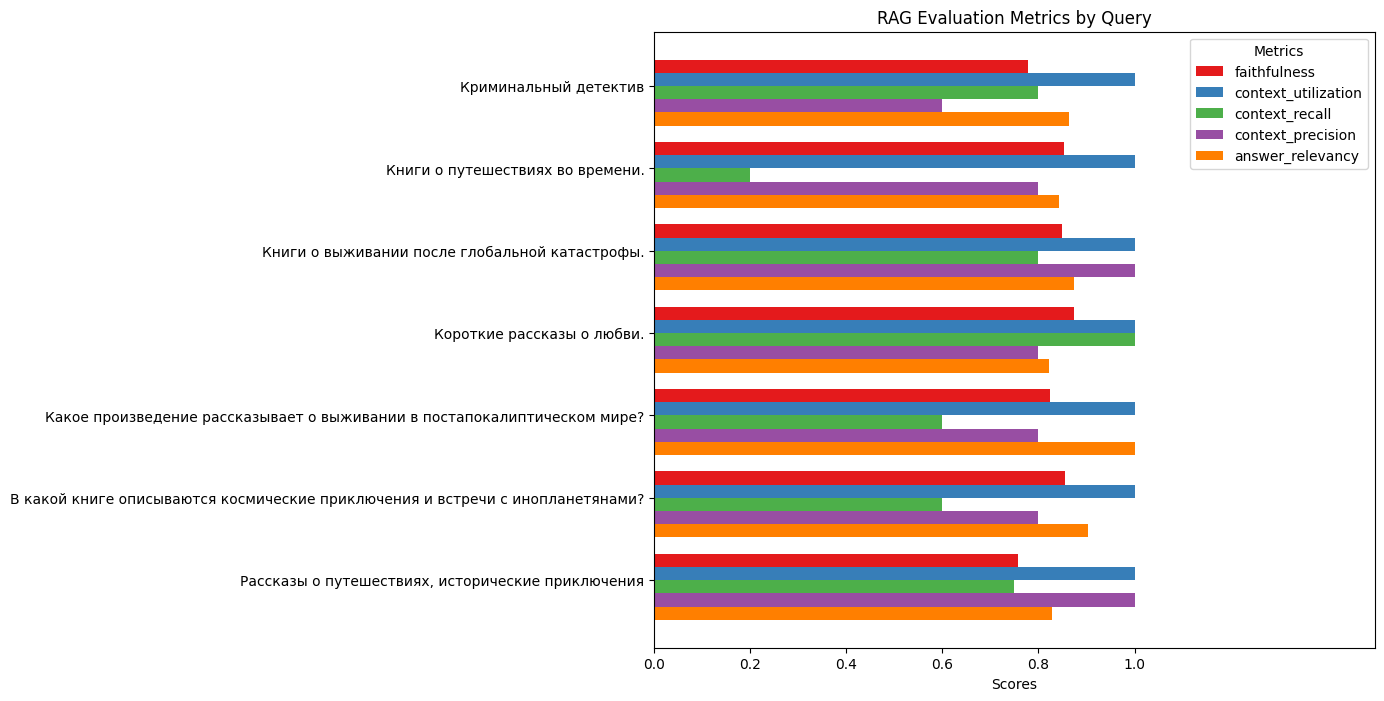

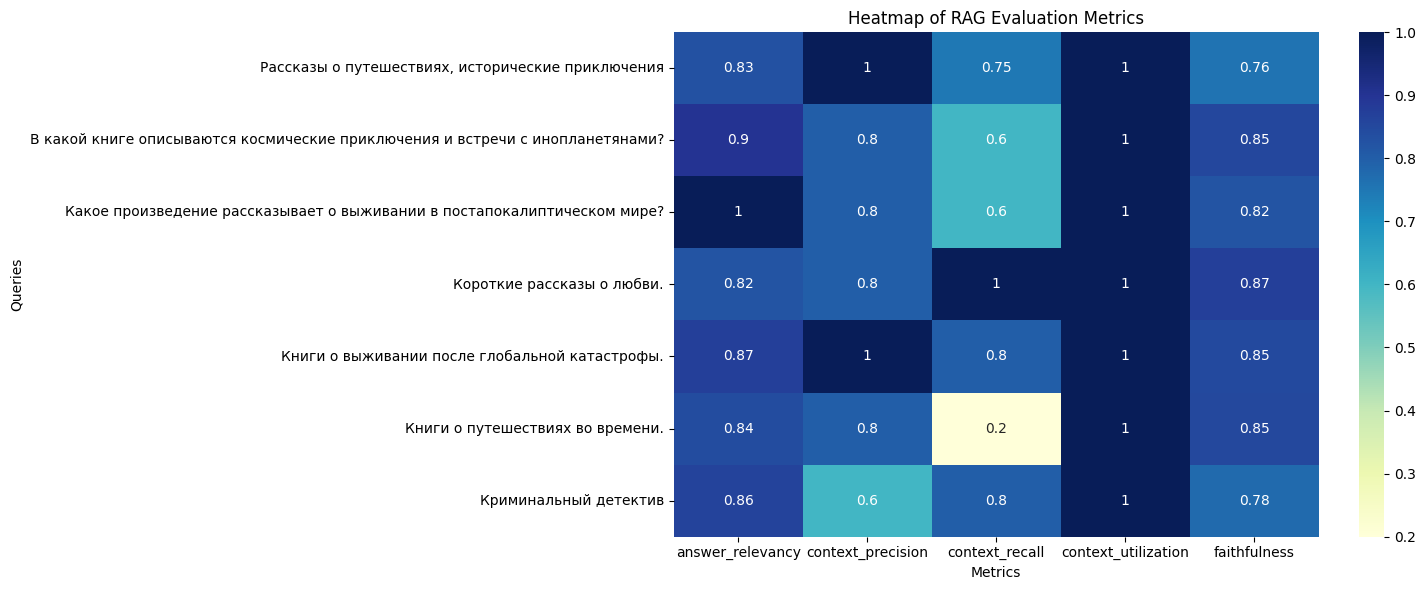

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(9.3, 8))

# Динамическая подготовка данных
queries = [item["query"] for item in evaluation_results]
metrics = sorted([key for key in evaluation_results[0].keys() if key != "query"], reverse=False)  # Упорядоченные метрики

# Значения метрик
values = [[item[metric] for metric in metrics] for item in evaluation_results]

# Установка палитры
plt.rc('axes', prop_cycle=plt.cycler('color', plt.cm.Set1.colors))  # Используем палитру 'Set1'

# Построение горизонтального графика
bar_width = 0.8  # Общая ширина столбца
y_positions = np.arange(len(queries))

# Инверсия порядка метрик: размещаем сверху вниз
for i, metric in reversed(list(enumerate(metrics))):  # Здесь добавлена `reversed()`
    metric_values = [item[metric] for item in evaluation_results]
    plt.barh(
        y_positions + i * (bar_width / len(metrics)) - bar_width / 2,
        metric_values,
        height=bar_width / len(metrics),
        label=metric,  # Название метрики для легенды
    )

# Настройки графика
plt.yticks(y_positions, queries)
plt.xlabel("Scores")
plt.title("RAG Evaluation Metrics by Query")
plt.legend(title="Metrics", loc="upper right")
plt.xlim(0, 1.5)
plt.xticks(ticks=np.arange(0, 1.1, 0.2))

# Показать график
plt.show()

# Создаем массив данных для тепловой карты
data = np.array([[result[metric] for metric in metrics] for result in evaluation_results])

# Визуализация тепловой карты
plt.figure(figsize=(15, 6))
sns.heatmap(data, annot=True, cmap="YlGnBu", yticklabels=queries, xticklabels=metrics)

# Настройки графика
plt.title("Heatmap of RAG Evaluation Metrics")
plt.xlabel("Metrics")
plt.ylabel("Queries")
plt.tight_layout()

# Показ графика
plt.show()